In [3]:
import os
from md_diffusion import *
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [4]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'
np_array_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/pos_np_array'
sim_type = 'temperature-rigid'
sim_type = 'temperature-flexible'
mol_name = 'DC_Cu110'

### Save numpy array

In [10]:
simdir = '%s/%s/%s' % (data_dir, sim_type, mol_name)
npdir = '%s/%s/%s' % (np_array_dir, sim_type, mol_name)
for temperature in os.listdir(simdir):
    temp_simdir = os.path.join(simdir, temperature)
    save_np_array(temp_simdir, npdir, t_skplog='log.%s' % mol_name)

Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
Creating directory -> /home/kutay/Documents/git/Nanocar/diffusion/docs/pos_np_array/temperature-flexible/DC_Cu110
250 | Shape: (10001, 10, 3) | Saved: /home/kutay/Documents/git/Nanocar/diffusion/docs/pos_np_array/temperature-flexible/DC_Cu110/250-pos
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
270 | Shape: (10001, 10, 3) | Saved: /home/kutay/Documents/git/Nanocar/diffusion/docs/pos_np_array/temperature-flexible/DC_Cu110/270-pos
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
200 | Shape: (10001, 10, 3) | Saved: /home/kutay/Documents/git/Nanocar/diffusion/docs/pos_np_array/temperature-flexible/DC_Cu110/200-pos
Run ids:  {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
210 | Shape: (10001, 10, 3) | Saved: /home/kutay/Documents/git/Nanocar/diffusion/docs/pos_np_array/temperat

### Read diffusion data

In [34]:
rigid_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/diff_plots/%s/%s' % ('temperature-rigid', mol_name)
rigid_data = read_diff_data(os.path.join(rigid_dir, 'diff.out'))
rigid_diff = collect_diff_data(rigid_dir)

In [7]:
flex_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/diff_plots/%s/%s' % ('temperature-flexible', mol_name)
flex_data = read_diff_data(os.path.join(flex_dir, 'diff.out'))
flex_diff = collect_diff_data(flex_dir)

In [20]:
temperatures = list(flex_diff.keys())
time_ranges = list(flex_diff[temperatures[0]].keys())
time_range_idx = {}
for idx, tr in enumerate(time_ranges, start=1):
    time_range_idx[tr] = idx
nrows = 2
ncols = np.ceil(len(time_ranges) / nrows)

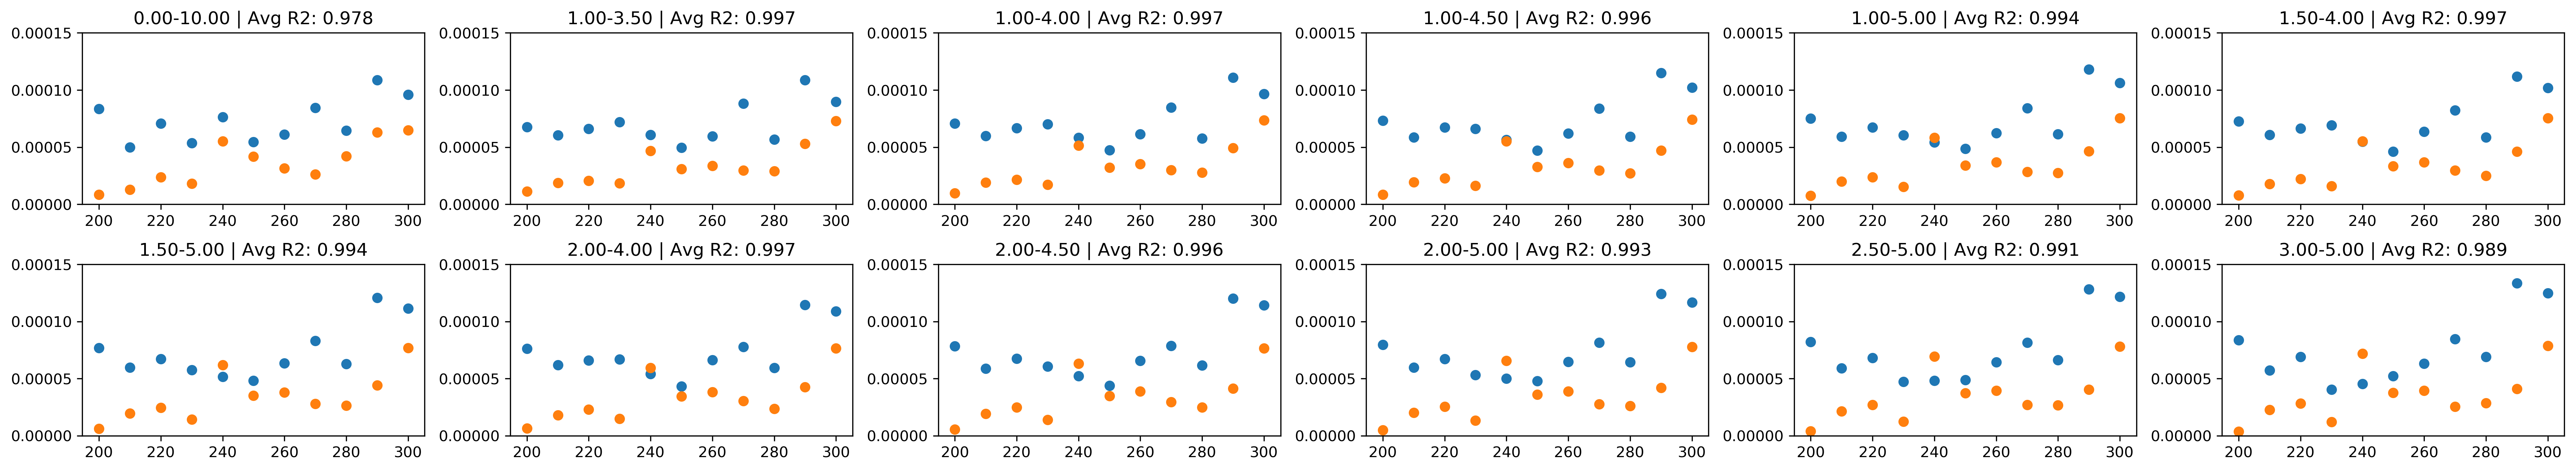

In [36]:
fig = plt.figure(figsize=(30, 5), dpi=300)
fig.subplots_adjust(hspace=.35, wspace=.25)

for r in time_ranges:
    ax = fig.add_subplot(nrows, ncols, time_range_idx[r])
    r_diff = [flex_diff[t][r]['cm2/s'] for t in temperatures]
    ax.scatter([int(i) for i in temperatures], r_diff)
    r2_avg = [flex_diff[t][r]['r2'] for t in temperatures]
    ax.set_ylim(0, 1.5e-4)
    ax.set_title('%s | Avg R2: %.3f' % (r, np.average(r2_avg)))
    
    r_diff = [rigid_diff[t][r]['cm2/s'] for t in temperatures]
    ax.scatter([int(i) for i in temperatures], r_diff)
#    r2_avg = [rigid_diff[t][r]['r2'] for t in temperatures]
#    ax.set_title('%s | Avg R2: %.3f' % (r, np.average(r2_avg)))

### Plot D

In [43]:
with open('diff_data.yaml', 'r') as f:
    diff_data = yaml.load(f)

In [44]:
mol_order

array([1, 6, 8, 7, 3, 0, 2, 4, 5])

In [47]:
molecules = list(diff_data['mw'].keys())
mol_order = np.argsort([diff_data['mw'][i] for i in molecules])
molecules = [molecules[i] for i in mol_order]
colors = dict(r='#CF5955', y='#EAC658', g='#66AD9B', b='#4e7fad')
shades = dict(r='#672C2A', y='#75632C', g='#33564D', b='#3B4C5C')

In [48]:
molecules

['PCARBORANE', 'PVBA', 'DNHD', 'BtPHD', 'TPEE', 'DC', 'C60', 'HtBDC', 'VL']

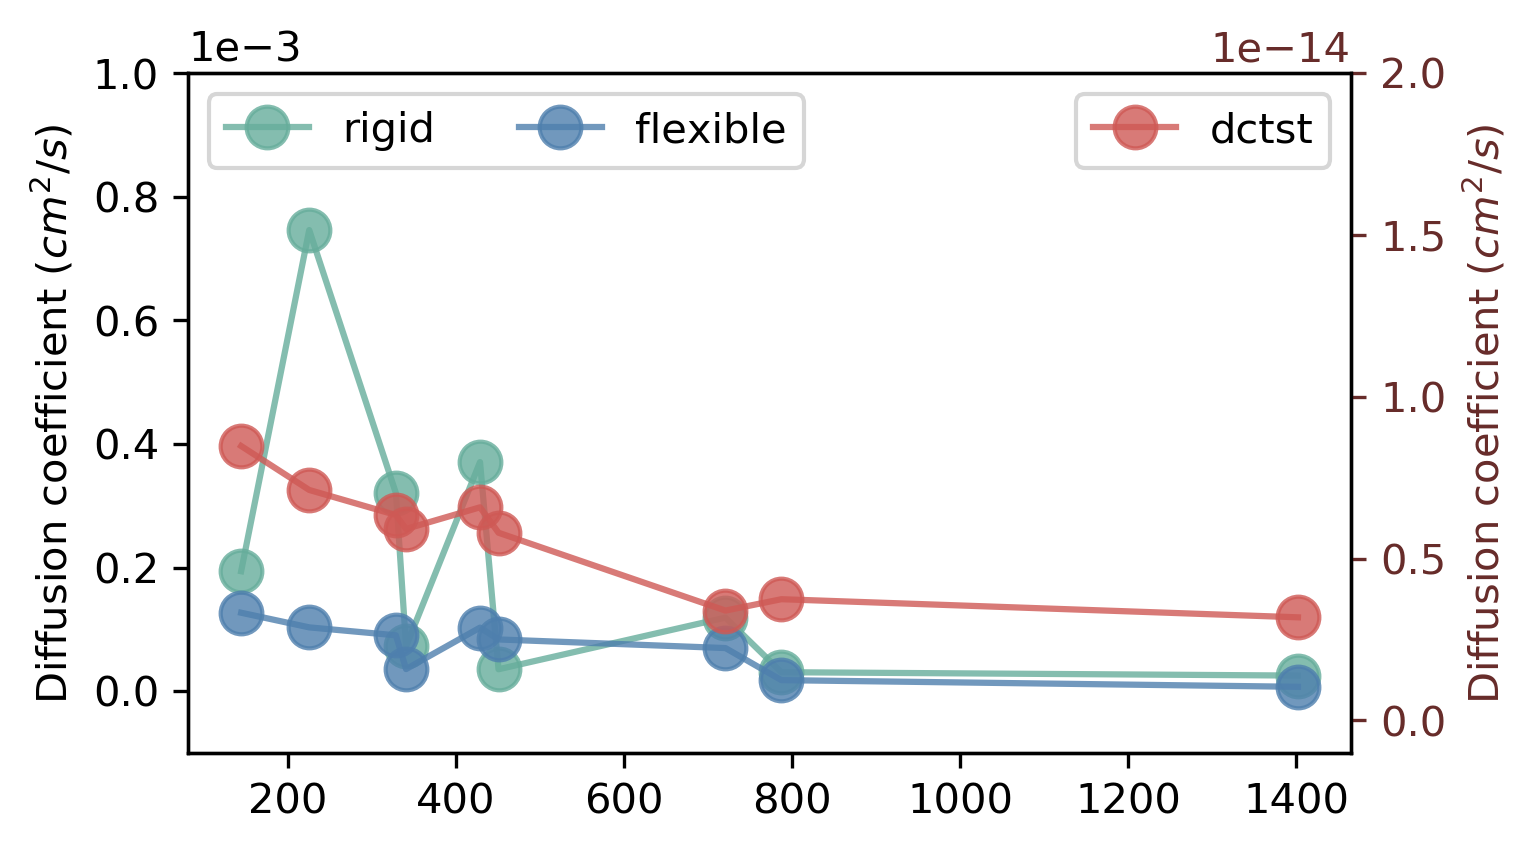

In [74]:
fig = plt.figure(figsize=(5, 3), dpi=300)
fig.subplots_adjust(hspace=.5, wspace=.25)

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot([diff_data['mw'][i] for i in molecules], [diff_data['rigid'][i] for i in molecules], '-o', markersize=10, alpha=0.8, c=colors['g'])
ax1.plot([diff_data['mw'][i] for i in molecules], [diff_data['flexible'][i] for i in molecules], '-o', markersize=10, alpha=0.8, c=colors['b'])
ax1.set_ylim(-1e-4, 1e-3)
ax1.legend(['rigid', 'flexible'], ncol=2, loc=2)
ax1.set_ylabel('Diffusion coefficient $(cm^2/s)$')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2 = ax1.twinx()
ax2.plot([diff_data['mw'][i] for i in molecules], [diff_data['dctst'][i] for i in molecules], '-o', markersize=10, alpha=0.8, c=colors['r'])
ax2.set_ylim(-1e-15, 2e-14)
ax2.legend(['dctst'], loc=1)
ax2.set_ylabel('Diffusion coefficient $(cm^2/s)$', color=shades['r'])
ax2.tick_params('y', colors=shades['r'])

# for mol in molecules:
#     ax2.text(diff_data['mw'][mol], 0, mol, rotation='vertical')

Text(0.5,0,'Molecular weight (g/mol)')

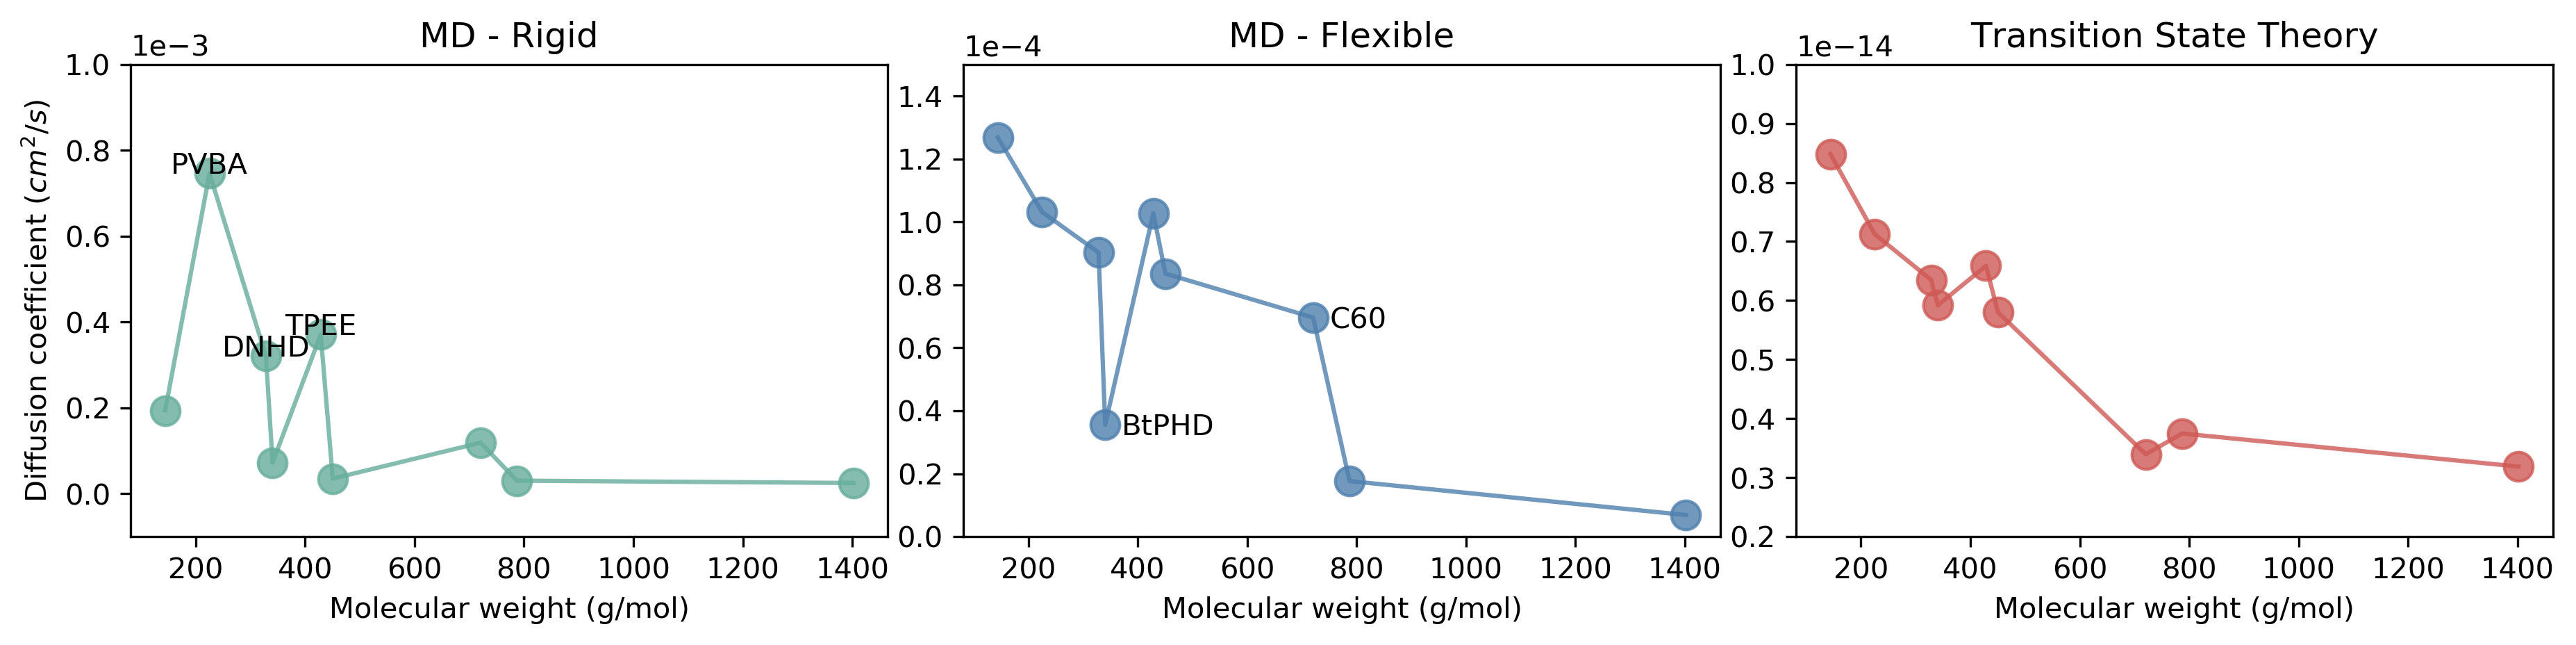

In [101]:
fig = plt.figure(figsize=(15, 3), dpi=300)
fig.subplots_adjust(hspace=.5, wspace=.1)

ax1 = fig.add_subplot(1, 3, 1, title='MD - Rigid')
ax1.plot([diff_data['mw'][i] for i in molecules], [diff_data['rigid'][i] for i in molecules], '-o', markersize=10, alpha=0.8, c=colors['g'])
ax1.set_ylim(-1e-4, 1e-3)
ax1.set_ylabel('Diffusion coefficient $(cm^2/s)$')
ax1.set_xlabel('Molecular weight (g/mol)')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
for mol_idx in [1, 2, 4]:
    ax1.text([diff_data['mw'][i] for i in molecules][mol_idx], [diff_data['rigid'][i] for i in molecules][mol_idx], molecules[mol_idx], horizontalalignment='center')

ax1 = fig.add_subplot(1, 3, 2, title='MD - Flexible')
ax1.plot([diff_data['mw'][i] for i in molecules], [diff_data['flexible'][i] for i in molecules], '-o', markersize=10, alpha=0.8, c=colors['b'])
ax1.set_ylim(0, 1.5e-4)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Molecular weight (g/mol)')
for mol_idx in [3, 6]:
    ax1.text([diff_data['mw'][i] for i in molecules][mol_idx] + 30, [diff_data['flexible'][i] for i in molecules][mol_idx] - 3.3e-6, molecules[mol_idx])

ax1 = fig.add_subplot(1, 3, 3, title='Transition State Theory')
ax1.plot([diff_data['mw'][i] for i in molecules], [diff_data['dctst'][i] for i in molecules], '-o', markersize=10, alpha=0.8, c=colors['r'])
ax1.set_ylim(2e-15, 1e-14)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Molecular weight (g/mol)')